the dataset is  cifar
input_shape: (32, 32, 1)
X_train shape:(50000, 32, 32, 1),X_test shape:(10000, 32, 32, 1)
Y_train shape:(50000, 10),Y_test shape:(10000, 10)
y_train shape:(50000, 1),y_test shape:(10000, 1)
H_X 13.287712379549449
H_Y 3.321928094887362


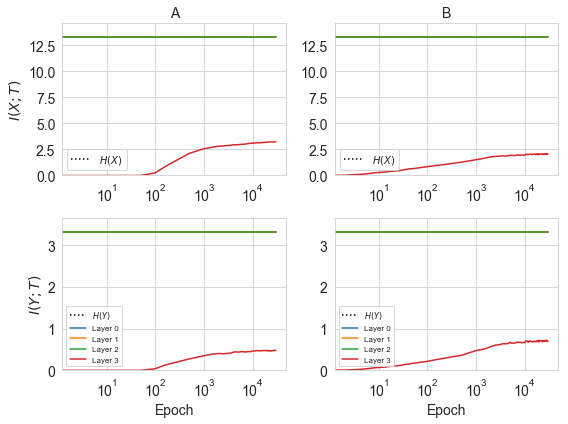

In [7]:
import utils
choice = 2
trn, tst,input_shape = utils.get_data(choice)

import json
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import numpy as np

measures = {}
saved_data = {}
drive_dir1='data_all/cifar/test/tanh_SHAPE_6-6-6_KERNEL_3-3-3_10_choice=2_pool=0/results'
drive_dir2='data_all/cifar/test/tanh_SHAPE_6-6-6_KERNEL_3-3-3_10_choice=2_pool=1/results'
# drive_dir3='data/train/learn0.001/tanh_SHAPE_6-6-6-6-6-6_KERNEL_3-3-3-3-3-3_10_choice=2_pool=0/results'
# drive_dir4='data/train/learn0.001/tanh_SHAPE_6-6-6-6-6-6-6-6-6_KERNEL_3-3-3-3-3-3-3-3-3_10_choice=2_pool=0/results'



#load data files
with open(drive_dir1+'/measures.txt', 'r') as f:     
        measures1 = json.load(f)
with open(drive_dir2+'/measures.txt', 'r') as f:     
        measures2 = json.load(f)
# with open(drive_dir3+'/measures.txt', 'r') as f:     
#         measures3 = json.load(f)
# with open(drive_dir4+'/measures.txt', 'r') as f:     
#         measures4 = json.load(f)
            


# with open(drive_dir+'/saved_data.txt', 'r') as f:     
#         saved_data = json.load(f)   

activation = list(measures1.keys())[0]

    
GRID_PLOT_LAYERS1 = len(measures1[activation]['0']['MI_XM_bin'])
GRID_PLOT_LAYERS2 = len(measures2[activation]['0']['MI_XM_bin'])
# GRID_PLOT_LAYERS3 = len(measures3[activation]['0']['MI_XM_bin'])
# GRID_PLOT_LAYERS4 = len(measures4[activation]['0']['MI_XM_bin'])



sns.set_style('whitegrid')
# max_epoch = max( (max(vals.keys()) if len(vals) else 0) for vals in measures1.values())
H_X = np.log2(10000)
print('H_X',H_X)

result,count = np.unique(tst.y,return_counts=True)
p = count/sum(count)
H_Y = -np.sum(p*np.log(p))/np.log(2)
print('H_Y',H_Y)

fig = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(2, 2)


vals1 = measures1[activation]
vals2 = measures2[activation]
# vals3 = measures3[activation]
# vals4 = measures4[activation]


epochs1 = np.array(sorted(list(map(int,vals1.keys()))))
epochs2 = np.array(sorted(list(map(int,vals2.keys()))))
# epochs3 = np.array(sorted(list(map(int,vals3.keys()))))
# epochs4 = np.array(sorted(list(map(int,vals4.keys()))))

    
vals_Xbinned1 = np.array([vals1[str(epoch)]['MI_XM_bin'] for epoch in epochs1])
vals_Xbinned2 = np.array([vals2[str(epoch)]['MI_XM_bin'] for epoch in epochs2])
# vals_Xbinned3 = np.array([vals3[str(epoch)]['MI_XM_bin'] for epoch in epochs3])
# vals_Xbinned4 = np.array([vals4[str(epoch)]['MI_XM_bin'] for epoch in epochs4])


vals_Ybinned1 = np.array([vals1[str(epoch)]['MI_YM_bin'] for epoch in epochs1])
vals_Ybinned2 = np.array([vals2[str(epoch)]['MI_YM_bin'] for epoch in epochs2])
# vals_Ybinned3 = np.array([vals3[str(epoch)]['MI_YM_bin'] for epoch in epochs3])
# vals_Ybinned4 = np.array([vals4[str(epoch)]['MI_YM_bin'] for epoch in epochs4])





plt.subplot(gs[0,0])        
plt.plot(epochs1, epochs1*0 + H_X, 'k:', label=r'$H(X)$')
for layerndx, layerid in enumerate(range(GRID_PLOT_LAYERS1)):        
    #I(X,M) bin        
    plt.plot(epochs1, vals_Xbinned1[:,layerid])    
plt.gca().set_xscale("log", nonposx='clip')
plt.ylim([0, 1.1*H_X])
plt.ylabel(r'$I(X;T)$',fontsize=14)
plt.title('A',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower left', frameon=True)

plt.subplot(gs[1,0]) 
plt.plot(epochs1, epochs1*0 + H_Y, 'k:', label=r'$H(Y)$')
for layerndx, layerid in enumerate(range(GRID_PLOT_LAYERS1)):
    #I(Y,M)bin               
    plt.plot(epochs1, vals_Ybinned1[:,layerid],label='Layer %d'%layerid)
#         plt.legend(loc='lower right')          
plt.gca().set_xscale("log", nonposx='clip')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim([0, 1.1*H_Y])
plt.ylabel(r'$I(Y;T)$',fontsize=14)
plt.xlabel('Epoch',fontsize=14)
plt.legend(loc='lower left', frameon=True,prop={'size':8})




plt.subplot(gs[0,1])        
plt.plot(epochs2, epochs2*0 + H_X, 'k:', label=r'$H(X)$')
for layerndx, layerid in enumerate(range(GRID_PLOT_LAYERS2)):        
    #I(X,M) bin        
    plt.plot(epochs2, vals_Xbinned2[:,layerid])    
plt.gca().set_xscale("log", nonposx='clip')
plt.ylim([0, 1.1*H_X])
# plt.ylabel(r'$I(X;T)$')
plt.title('B',fontsize=14)
plt.legend(loc='lower left', frameon=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplot(gs[1,1]) 
plt.plot(epochs2, epochs2*0 + H_Y, 'k:', label=r'$H(Y)$')
for layerndx, layerid in enumerate(range(GRID_PLOT_LAYERS2)):
    #I(Y,M)bin               
    plt.plot(epochs2, vals_Ybinned2[:,layerid],label='Layer %d'%layerid)
#         plt.legend(loc='lower right')          
plt.gca().set_xscale("log", nonposx='clip')
plt.ylim([0, 1.1*H_Y])
# plt.ylabel(r'$I(Y;T)$')
plt.xlabel('Epoch',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower left', frameon=True,prop={'size':8})





# plt.subplot(gs[0,2])        
# plt.plot(epochs3, epochs3*0 + H_X, 'k:', label=r'$H(X)$')
# for layerndx, layerid in enumerate(range(GRID_PLOT_LAYERS3)):        
#     #I(X,M) bin        
#     plt.plot(epochs3, vals_Xbinned3[:,layerid])    
# plt.gca().set_xscale("log", nonposx='clip')
# plt.ylim([0, 1.1*H_X])
# # plt.ylabel(r'$I(X;T)$')
# plt.title('C',fontsize=14)
# plt.legend(loc='lower left', frameon=True)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.subplot(gs[1,2]) 
# plt.plot(epochs3, epochs3*0 + H_Y, 'k:', label=r'$H(Y)$')
# for layerndx, layerid in enumerate(range(GRID_PLOT_LAYERS3)):
#     #I(Y,M)bin               
#     plt.plot(epochs3, vals_Ybinned3[:,layerid],label='Layer %d'%layerid)
# #         plt.legend(loc='lower right')          
# plt.gca().set_xscale("log", nonposx='clip')
# plt.ylim([0, 1.1*H_Y])
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# # plt.ylabel(r'$I(Y;T)$')
# plt.xlabel('Epoch',fontsize=14)
# plt.legend(loc='lower left', frameon=True,prop={'size':8})





# plt.subplot(gs[0,3])        
# plt.plot(epochs4, epochs4*0 + H_X, 'k:', label=r'$H(X)$')
# for layerndx, layerid in enumerate(range(GRID_PLOT_LAYERS4)):        
#     #I(X,M) bin        
#     plt.plot(epochs4, vals_Xbinned4[:,layerid])    
# plt.gca().set_xscale("log", nonposx='clip')
# plt.ylim([0, 1.1*H_X])
# # plt.ylabel(r'$I(X;T)$')
# plt.title('D',fontsize=14)
# plt.legend(loc='lower left', frameon=True)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.subplot(gs[1,3]) 
# plt.plot(epochs4, epochs4*0 + H_Y, 'k:', label=r'$H(Y)$')
# for layerndx, layerid in enumerate(range(GRID_PLOT_LAYERS4)):
#     #I(Y,M)bin               
#     plt.plot(epochs4, vals_Ybinned4[:,layerid],label='Layer %d'%layerid)
# #         plt.legend(loc='lower right')          
# plt.gca().set_xscale("log", nonposx='clip')
# plt.ylim([0, 1.1*H_Y])
# # plt.ylabel(r'$I(Y;T)$')
# plt.xlabel('Epoch',fontsize=14)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.legend(loc='lower left', frameon=True,prop={'size':8})


    

plt.tight_layout()
plt.savefig('./mi')


In [4]:
import tensorflow as tf
import keras 


Using TensorFlow backend.


10000 10000 10000 10000


C:\Software\Anaconda\envs\py36\lib\site-packages\ipykernel_launcher.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


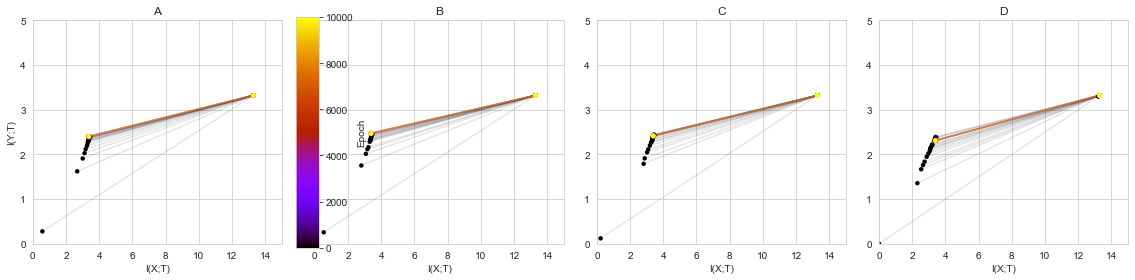

In [12]:
temp1 = max(epochs1)+1
temp2 = max(epochs2)+1
temp3 = max(epochs3)+1
temp4 = max(epochs4)+1

print(temp1,temp2,temp3,temp4)

sm = plt.cm.ScalarMappable(cmap='gnuplot', norm=plt.Normalize(vmin=0, vmax=10000))

fig=plt.figure(figsize=(4*4,4))
gs = gridspec.GridSpec(1,4)


# plot upper Information Plane
plt.subplot(gs[0,0])   
for index,epoch in enumerate(epochs1):
    c = sm.to_rgba(epoch)
    xmvals = vals_Xbinned1[index][range(GRID_PLOT_LAYERS1)]
    ymvals = vals_Ybinned1[index][range(GRID_PLOT_LAYERS1)]

    plt.plot(xmvals, ymvals, c=c, alpha=0.1, zorder=1)
    plt.scatter(xmvals, ymvals, s=20, facecolors=[c for _ in range(GRID_PLOT_LAYERS1)], edgecolor='none', zorder=2)

plt.ylim([0,5])
plt.xlim([0,15])
plt.xlabel('I(X;T)')
plt.ylabel('I(Y;T)')
plt.title('A')


plt.subplot(gs[0,1])   
for index,epoch in enumerate(epochs2):
    c = sm.to_rgba(epoch)
    xmvals = vals_Xbinned2[index][range(GRID_PLOT_LAYERS2)]
    ymvals = vals_Ybinned2[index][range(GRID_PLOT_LAYERS2)]

    plt.plot(xmvals, ymvals, c=c, alpha=0.1, zorder=1)
    plt.scatter(xmvals, ymvals, s=20, facecolors=[c for _ in range(GRID_PLOT_LAYERS2)], edgecolor='none', zorder=2)

plt.ylim([0,5])
plt.xlim([0,15])
plt.xlabel('I(X;T)')
plt.title('B')


plt.subplot(gs[0,2])   
for index,epoch in enumerate(epochs3):
    c = sm.to_rgba(epoch)
    xmvals = vals_Xbinned3[index][range(GRID_PLOT_LAYERS3)]
    ymvals = vals_Ybinned3[index][range(GRID_PLOT_LAYERS3)]

    plt.plot(xmvals, ymvals, c=c, alpha=0.1, zorder=1)
    plt.scatter(xmvals, ymvals, s=20, facecolors=[c for _ in range(GRID_PLOT_LAYERS3)], edgecolor='none', zorder=2)

plt.ylim([0,5])
plt.xlim([0,15])
plt.xlabel('I(X;T)')
plt.title('C')


plt.subplot(gs[0,3])   
for index,epoch in enumerate(epochs4):
    c = sm.to_rgba(epoch)
    xmvals = vals_Xbinned4[index][range(GRID_PLOT_LAYERS4)]
    ymvals = vals_Ybinned4[index][range(GRID_PLOT_LAYERS4)]

    plt.plot(xmvals, ymvals, c=c, alpha=0.1, zorder=1)
    plt.scatter(xmvals, ymvals, s=20, facecolors=[c for _ in range(GRID_PLOT_LAYERS4)], edgecolor='none', zorder=2)

plt.ylim([0,5])
plt.xlim([0,15])
plt.xlabel('I(X;T)')
plt.title('D')    

        
cbaxes = fig.add_axes([0.26, 0.125, 0.02, 0.8]) 
plt.colorbar(sm, label='Epoch', cax=cbaxes)
plt.tight_layout()

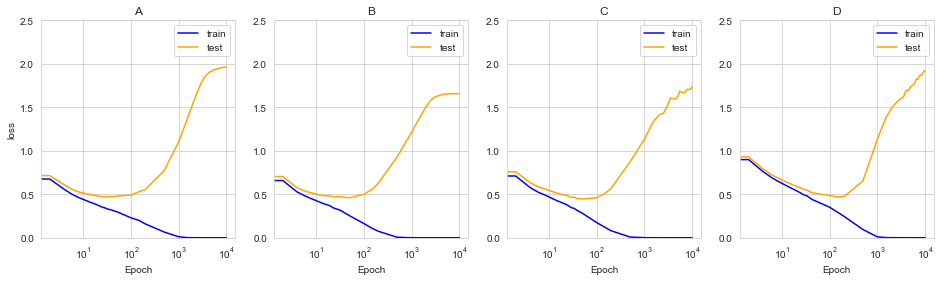

In [13]:
#load data files
with open(drive_dir1+'/saved_data.txt', 'r') as f:     
        save_data1 = json.load(f)
with open(drive_dir2+'/saved_data.txt', 'r') as f:     
        save_data2 = json.load(f)
        
with open(drive_dir3+'/saved_data.txt', 'r') as f:     
        save_data3 = json.load(f)
with open(drive_dir4+'/saved_data.txt', 'r') as f:     
        save_data4 = json.load(f)
        
        
vals_data1 = save_data1[activation]
vals_data2 = save_data2[activation]
vals_data3 = save_data3[activation]
vals_data4 = save_data4[activation]


trnloss1 = np.array([vals_data1['trnloss'][str(i)] for i,epoch in enumerate(epochs1)])
trnloss2 = np.array([vals_data2['trnloss'][str(i)] for i,epoch in enumerate(epochs2)])
trnloss3 = np.array([vals_data3['trnloss'][str(i)] for i,epoch in enumerate(epochs3)])
trnloss4 = np.array([vals_data4['trnloss'][str(i)] for i,epoch in enumerate(epochs4)])

tstloss1 = np.array([vals_data1['tstloss'][str(i)] for i,epoch in enumerate(epochs1)])
tstloss2 = np.array([vals_data2['tstloss'][str(i)] for i,epoch in enumerate(epochs2)])
tstloss3 = np.array([vals_data3['tstloss'][str(i)] for i,epoch in enumerate(epochs3)])
tstloss4 = np.array([vals_data4['tstloss'][str(i)] for i,epoch in enumerate(epochs4)])



fig=plt.figure(figsize=(16,4))
gs = gridspec.GridSpec(1,4)

plt.subplot(gs[0,0])   
plt.plot(epochs1,trnloss1,color='blue',label='train')
plt.plot(epochs1,tstloss1,color='orange',label='test')
plt.gca().set_xscale("log", nonposx='clip')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('A')
plt.ylim([0,2.5])
plt.legend()

plt.subplot(gs[0,1])   
plt.plot(epochs2,trnloss2,color='blue',label='train')
plt.plot(epochs2,tstloss2,color='orange',label='test')
plt.gca().set_xscale("log", nonposx='clip')
plt.ylim([0,2.5])
plt.xlabel('Epoch')
plt.title('B')
plt.legend()

plt.subplot(gs[0,2])   
plt.plot(epochs3,trnloss3,color='blue',label='train')
plt.plot(epochs3,tstloss3,color='orange',label='test')
plt.gca().set_xscale("log", nonposx='clip')
plt.xlabel('Epoch')
plt.title('C')
plt.ylim([0,2.5])
plt.legend()

plt.subplot(gs[0,3])   
plt.plot(epochs4,trnloss4,color='blue',label='train')
plt.plot(epochs4,tstloss4,color='orange',label='test')
plt.gca().set_xscale("log", nonposx='clip')
plt.ylim([0,2.5])
plt.xlabel('Epoch')
plt.title('D')
plt.legend()


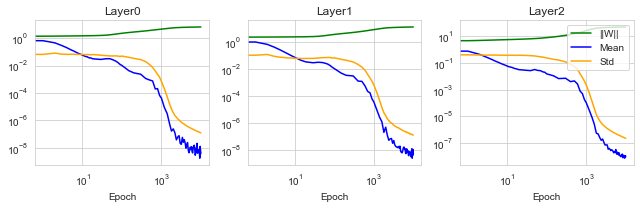

In [21]:
wnorms1 = np.array([vals_data1['wnorms'][str(i)] for i,epoch in enumerate(epochs1)])
means1 = np.array([vals_data1['means'][str(i)] for i,epoch in enumerate(epochs1)])
stds1 = np.array([vals_data1['stds'][str(i)] for i,epoch in enumerate(epochs1)])

fig=plt.figure(figsize=(3*GRID_PLOT_LAYERS1,3))
gs = gridspec.GridSpec(1,GRID_PLOT_LAYERS1)


for indx,layerid in enumerate(range(GRID_PLOT_LAYERS1)):

    plt.subplot(gs[0,indx])   
    plt.plot(epochs1,[x[str(layerid)] for x in wnorms1],'g',label='||W||')
    plt.plot(epochs1,[x[str(layerid)] for x in means1],'b',label='Mean')
    plt.plot(epochs1,[x[str(layerid)] for x in stds1],'orange',label='Std')
    
    
    plt.title('Layer%d'%layerid)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Epoch')

plt.legend(loc='upper right')

plt.tight_layout()

In [1]:
import utils
import os
import numpy as np
import pickle
from collections import namedtuple


choice = 0
flag=choice
trn, tst,input_shape = utils.get_data(choice)

print("PART of DATA")       
if (not os.path.exists("DATASET/data0"))or(os.path.exists("DATASET/data0")):  
    try:
        os.makedirs("DATASET")
    except Exception as e:
        print(e)
    with open('choice', 'rb') as f:
            label_choice_trn = pickle.load(f)

    trn_X=trn.X[label_choice_trn[0]]
    trn_Y=trn.Y[label_choice_trn[0]]
    trn_y=trn.y[label_choice_trn[0]]


    for i in range(1,10):
        trn_X=np.concatenate((trn_X,trn.X[label_choice_trn[i]]),0)
        trn_Y=np.concatenate((trn_Y,trn.Y[label_choice_trn[i]]),0)
        trn_y=np.concatenate((trn_y,trn.y[label_choice_trn[i]]),0)

    Dataset = namedtuple('Dataset',['X','Y','y'])
    trn_new = Dataset(trn_X, trn_Y,trn_y)
    tst_new = Dataset(tst.X, tst.Y,tst.y)

    if flag==0:
        with open("DATASET\data0", 'wb') as f:
                pickle.dump({'trn':trn_new,'tst':tst_new}, f, pickle.HIGHEST_PROTOCOL) 
    elif flag==1:
        with open("DATASET\data1", 'wb') as f:
                pickle.dump({'trn':trn_new,'tst':tst_new}, f, pickle.HIGHEST_PROTOCOL) 
else:
    if flag==0:
        with open('DATASET/data0', 'rb') as f:
            temp = pickle.load(f)
            trn_new = temp['trn']
            tst=temp['tst']
    elif flag==1:
        with open('DATASET/data1', 'rb') as f:
            temp = pickle.load(f)
            trn_new = temp['trn']
            tst=temp['tst']


Using TensorFlow backend.


the dataset is  MNIST
input_shape: (28, 28, 1)
X_train shape:(60000, 28, 28, 1),X_test shape:(10000, 28, 28, 1)
Y_train shape:(60000, 10),Y_test shape:(10000, 10)
y_train shape:(60000,),y_test shape:(10000,)
PART of DATA
[WinError 183] 当文件已存在时，无法创建该文件。: 'DATASET'


In [6]:
import pickle

# with open('DATASET\data0', 'rb') as f:
#         d = pickle.load(f)
# trn = d['trn']        
# tst = d['tst']
print(label_choice_trn[0].shape)
# print(trn.X.shape)
# print(tst.X.shape)

Error: connect ECONNREFUSED 127.0.0.1:56641

In [7]:
print('123')

123
